In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_f = '/home/zacharykeskinen/CS430-TeamE/PA3/slurms/logs/mm.log'
with open(log_f) as f:
    lns = f.readlines()

In [3]:
df = pd.DataFrame()
for l in lns:
    if '-' in l and '--------------------' not in l:
        if 'SMALL' not in l:
            for k, v in res.items():
                df.loc[k, size] = v
        size = l.replace('-','').replace('\n','').upper()
        res = {}
    if 'nodes' in l:
        nodes = l.replace(' nodes\n','')
    elif 's\n' in l:
        res[int(nodes)] = float(l.replace('s\n',''))
for k, v in res.items():
    df.loc[k, size] = v
df.loc[1, 'SMALL'] = 0.060000
df.loc[1, 'MEDIUM'] = 18.200000
df.loc[1, 'LARGE'] = 491.620000
df = df.sort_index()
df = df.rename({'SMALL':'240x240 Run Time','MEDIUM':'1600x1600 Run Time','LARGE':'4800x4800 Run Time'}, axis =1 )

Text(0.5, 1.0, 'Matrix-Matrix Multiplication MPI Execution Time')

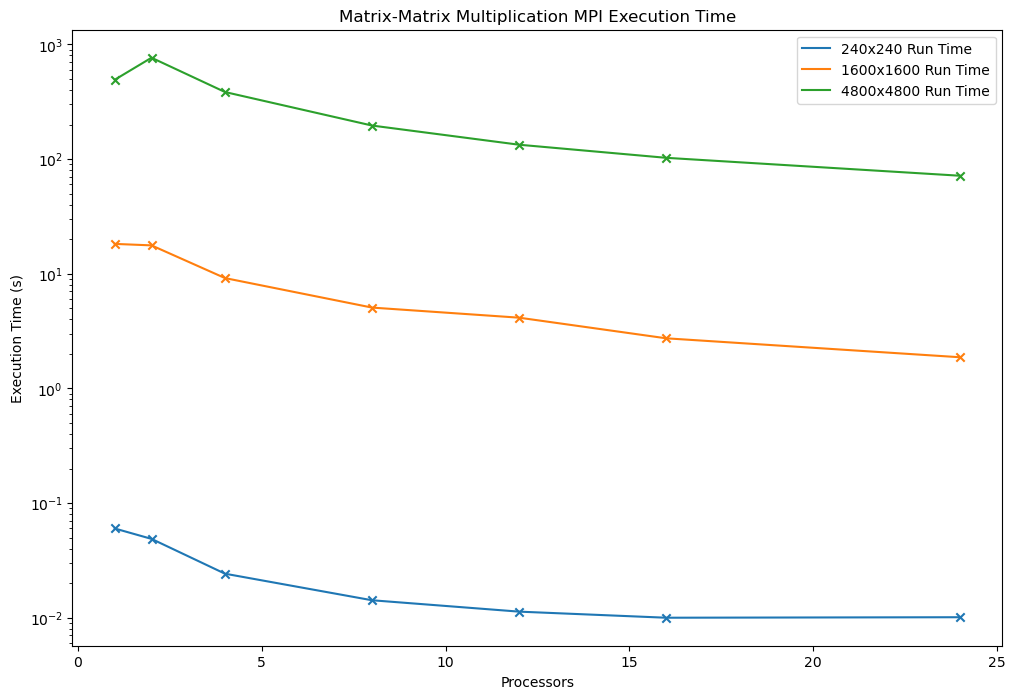

In [4]:
f, ax = plt.subplots(figsize = (12,8))
df.plot(ax = ax)
plt.scatter(df.index, df['240x240 Run Time'], marker = 'x')
plt.scatter(df.index, df['1600x1600 Run Time'], marker = 'x')
plt.scatter(df.index, df['4800x4800 Run Time'], marker = 'x')

plt.xlabel("Processors")
plt.ylabel("Execution Time (s)")
plt.yscale("log")
plt.title("Matrix-Matrix Multiplication MPI Execution Time")

Text(0.5, 1.0, 'Matrix Matrix Multiplication MPI Speed-Up')

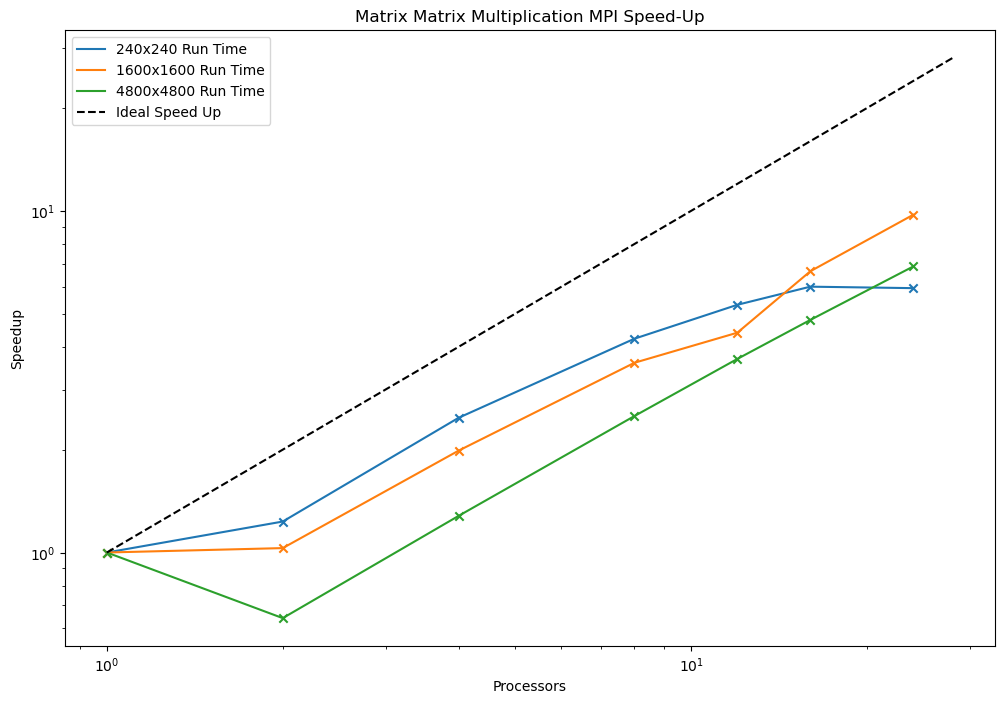

In [5]:
f, ax = plt.subplots(figsize = (12,8))
speed = df.iloc[0].div(df)
speed.plot(ax = ax)
plt.scatter(speed.index, speed['240x240 Run Time'], marker = 'x')
plt.scatter(speed.index, speed['1600x1600 Run Time'], marker = 'x')
plt.scatter(speed.index, speed['4800x4800 Run Time'], marker = 'x')
ideal = range(1, 29)
plt.plot(ideal, ideal, label = 'Ideal Speed Up', linestyle = 'dashed', color = 'black')
plt.xlabel("Processors")
plt.ylabel("Speedup")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Matrix Matrix Multiplication MPI Speed-Up")

In [20]:
log_f = '/home/zacharykeskinen/CS430-TeamE/PA3/slurms/logs/mv.log'
with open(log_f) as f:
    lns = f.readlines()

In [24]:
df = pd.DataFrame()
for l in lns:
    if '-' in l and '--------------------' not in l:
        if 'SMALL' not in l:
            for k, v in res.items():
                df.loc[k, size] = v
        size = l.replace('-','').replace('\n','').upper()
        res = {}
    if 'nodes' in l:
        nodes = l.replace(' nodes\n','')
    elif 'Time taken' in l:
        res[int(nodes)] = float(l.split(' ')[-2]) * 1e-6
for k, v in res.items():
    df.loc[k, size] = v
df.loc[1, 'SMALL'] = 0.0005
df.loc[1, 'MEDIUM'] = 0.01
df.loc[1, 'LARGE'] = 0.14
df = df.sort_index()
df = df.rename({'SMALL':'240x240 Run Time','MEDIUM':'1600x1600 Run Time','LARGE':'4800x4800 Run Time'}, axis =1 )

Text(0.5, 1.0, 'Matrix-Vector Multiplication MPI Execution Time')

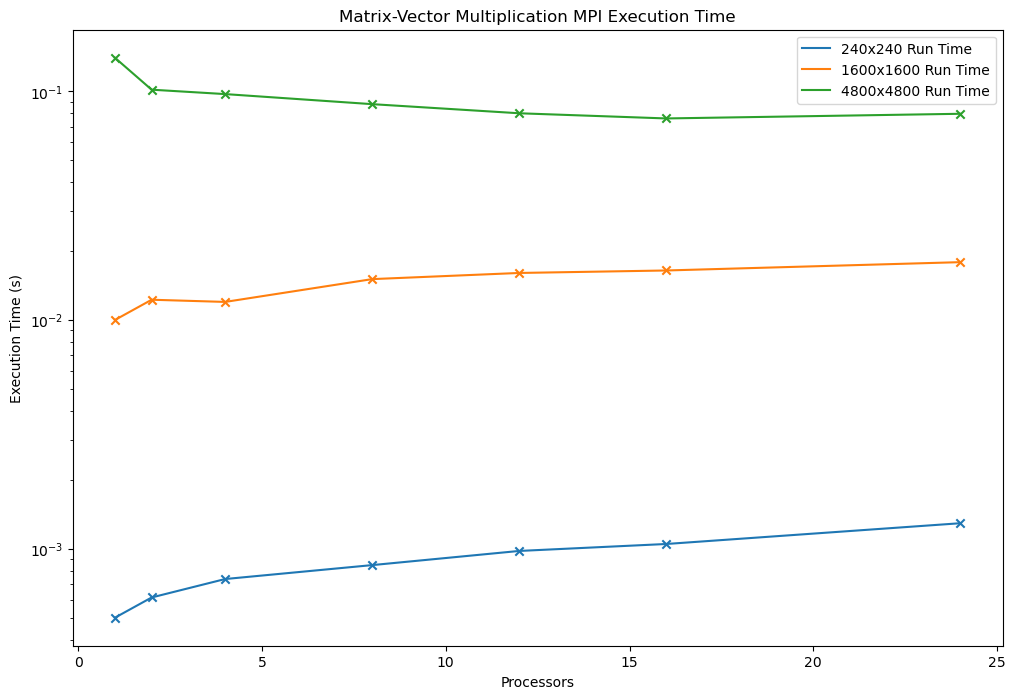

In [25]:
f, ax = plt.subplots(figsize = (12,8))
df.plot(ax = ax)
plt.scatter(df.index, df['240x240 Run Time'], marker = 'x')
plt.scatter(df.index, df['1600x1600 Run Time'], marker = 'x')
plt.scatter(df.index, df['4800x4800 Run Time'], marker = 'x')

plt.xlabel("Processors")
plt.ylabel("Execution Time (s)")
plt.yscale("log")
plt.title("Matrix-Vector Multiplication MPI Execution Time")

Text(0.5, 1.0, 'Matrix Vector Multiplication MPI Speed-Up')

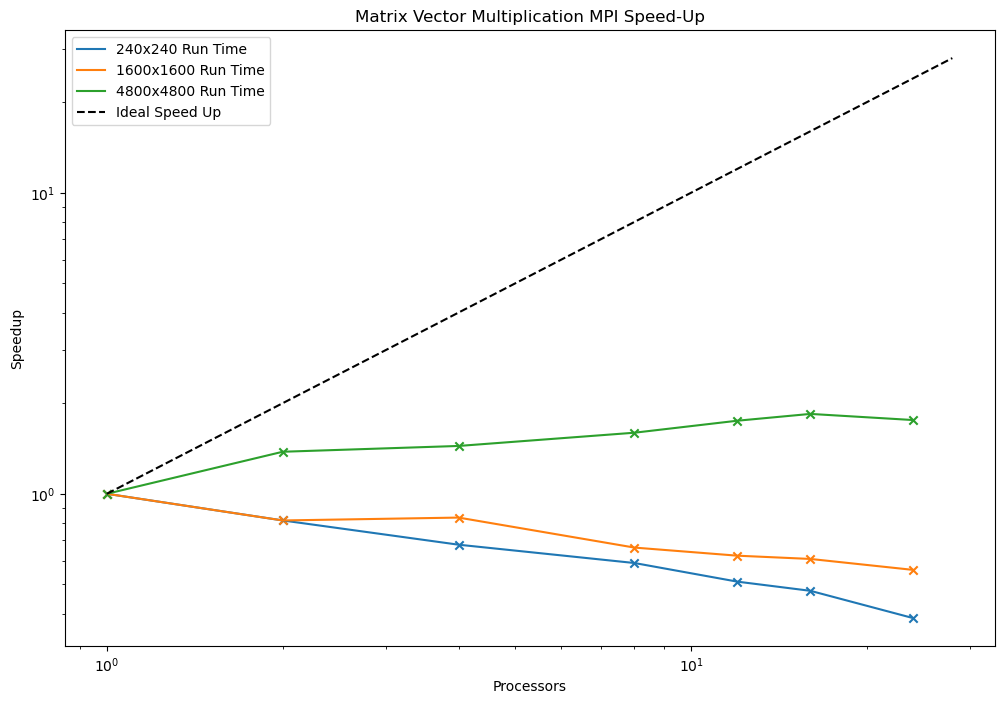

In [27]:
f, ax = plt.subplots(figsize = (12,8))
speed = df.iloc[0].div(df)
speed.plot(ax = ax)
plt.scatter(speed.index, speed['240x240 Run Time'], marker = 'x')
plt.scatter(speed.index, speed['1600x1600 Run Time'], marker = 'x')
plt.scatter(speed.index, speed['4800x4800 Run Time'], marker = 'x')
ideal = range(1, 29)
plt.plot(ideal, ideal, label = 'Ideal Speed Up', linestyle = 'dashed', color = 'black')
plt.xlabel("Processors")
plt.ylabel("Speedup")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Matrix Vector Multiplication MPI Speed-Up")